In [1]:
import sys, os
module_rootdir = '../../..'
dataset_root_dir = '../../../../'
sys.path.append(module_rootdir)

import config_dataset
from modules.dataset_utils.bdd_dataset_utils.bdd_utils import aggregate_ground_truths
from modules.dataset_utils.bdd_dataset_utils.dataset_summary import obj_box_summary, aggregated_bboxes, sort_according_to_box_criteria
from modules.plot.viz_annotation import vizualize_bbox

In [2]:
train_images_dir = config_dataset.bdd_train_images_dir
train_labels_file = config_dataset.bdd_train_labels_file
train_lane_labels_file = config_dataset.bdd_train_lane_labels_file

selected_labels, label_names = aggregate_ground_truths(
    dataset_root_dir,
    train_labels_file, 
    train_images_dir, 
    train_lane_labels_file, 
    verbose=False)

bbox_summary = obj_box_summary(selected_labels)
boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all = aggregated_bboxes(bbox_summary)

Load JSON file .. please wait
annotations from 69863/69863 aggregated : Aggregation COMPLETE


## Annotated bounding box is too small

In [3]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_area', order='ascending')

box_area_sorted[:100]

array([ 0.8715016,  0.9366854,  1.3637215,  1.498622 ,  1.9917687,
        1.9918069,  1.9918753,  1.9918905,  2.2407322,  2.3954346,
        2.4896348,  2.489768 ,  2.987714 ,  2.9970944,  2.997244 ,
        3.330273 ,  3.5408952,  3.5721982,  3.7464614,  3.9834766,
        3.9836795,  3.9837506,  4.14717  ,  4.31163  ,  4.3116746,
        4.3427944,  4.426119 ,  4.486483 ,  4.7084446,  4.8506227,
        4.868944 ,  5.0468793,  5.3114643,  5.3284917,  5.3284917,
        5.389526 ,  5.389795 ,  5.601998 ,  5.6078696,  6.045028 ,
        6.1684146,  6.360876 ,  6.4559155,  6.4559155,  6.4560666,
        6.456368 ,  6.722166 ,  6.7437983,  6.752207 ,  7.0817904,
        7.473062 ,  7.493109 ,  7.6541686,  7.966984 ,  7.966984 ,
        7.966984 ,  7.967014 ,  7.967085 ,  7.9671206,  7.967136 ,
        7.967136 ,  7.9672422,  7.9672575,  7.9672575,  7.9672575,
        7.9674706,  8.3748665,  8.62308  ,  8.62326  ,  8.62326  ,
        8.62326  ,  8.623648 ,  8.640414 ,  8.890945 ,  8.9099

box aspect ratio : 13.99865436553955
box area         : 0.871501624584198
box width        : 3.492828369140625
box height       : 0.24951171875
box class        : car


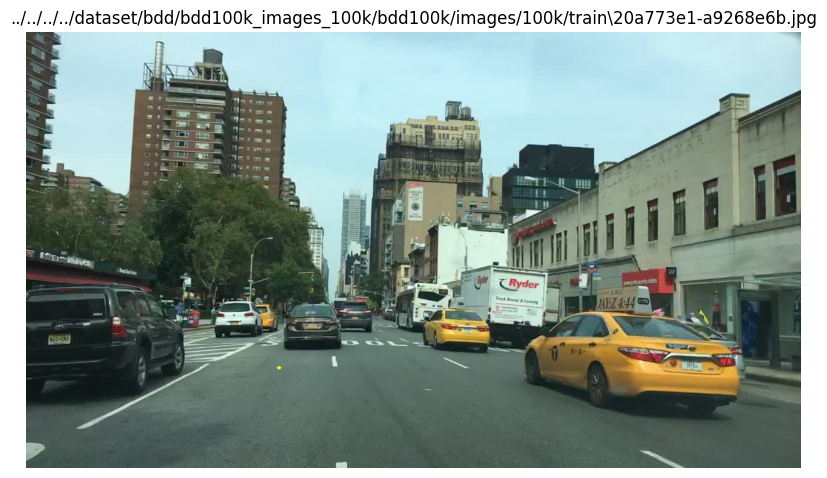

box aspect ratio : 0.10000498592853546
box area         : 0.9366853833198547
box width        : 0.306060791015625
box height       : 3.060455322265625
box class        : traffic light


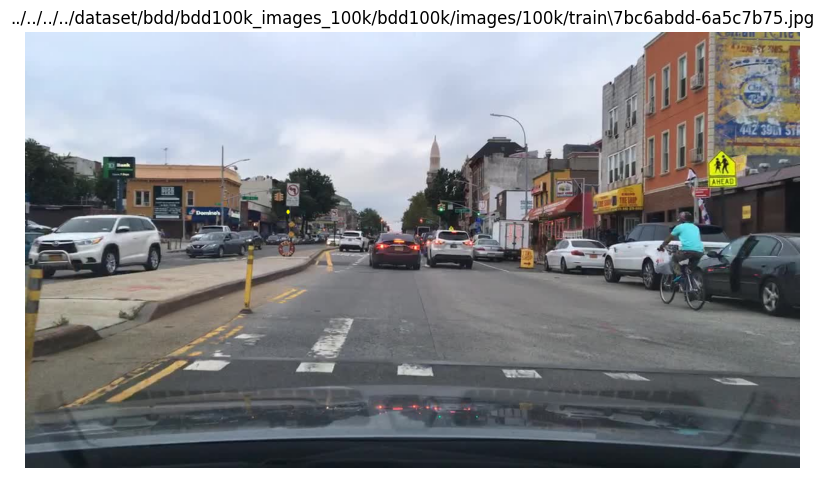

box aspect ratio : 0.008337200619280338
box area         : 1.363721489906311
box width        : 0.10662841796875
box height       : 12.789474487304688
box class        : traffic light


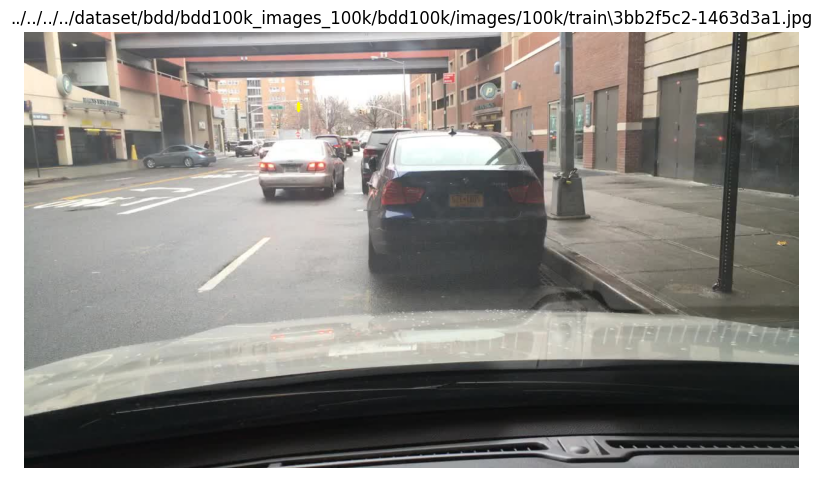

In [4]:
N1 = 0; N2 = 3
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]

sel_image_paths = [os.path.join(dataset_root_dir, path) for path in sel_image_paths]
for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    print('='*100)
    print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
    print(f'box area         : {sel_boxes_area[idx]}') 
    print(f'box width        : {boxes_w[idx]}') 
    print(f'box height       : {boxes_h[idx]}') 
    print(f'box class        : {obj_label}')
    vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

## Incorrect class labels

idx: 5
box aspect ratio : 2.669745922088623
box area         : 603797.8125
box width        : 1269.640380859375
box height       : 475.5660095214844
box class        : car


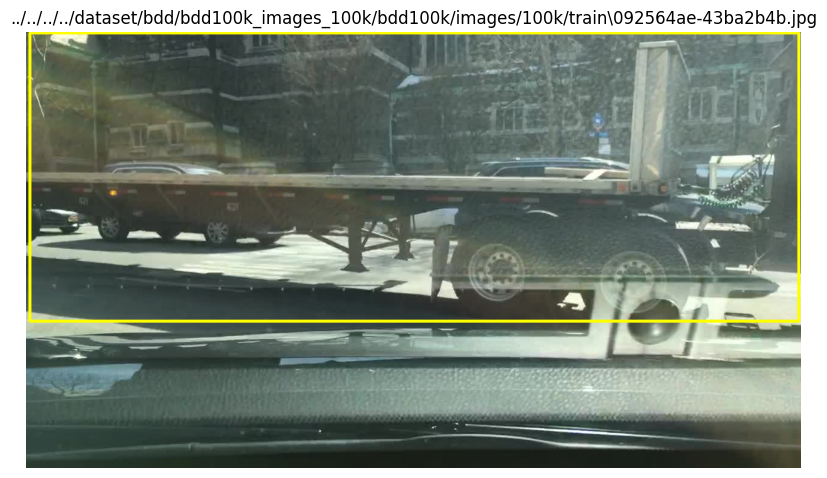

idx: 18
box aspect ratio : 1.7912280559539795
box area         : 906063.4375
box width        : 1273.9569091796875
box height       : 711.2198486328125
box class        : traffic sign


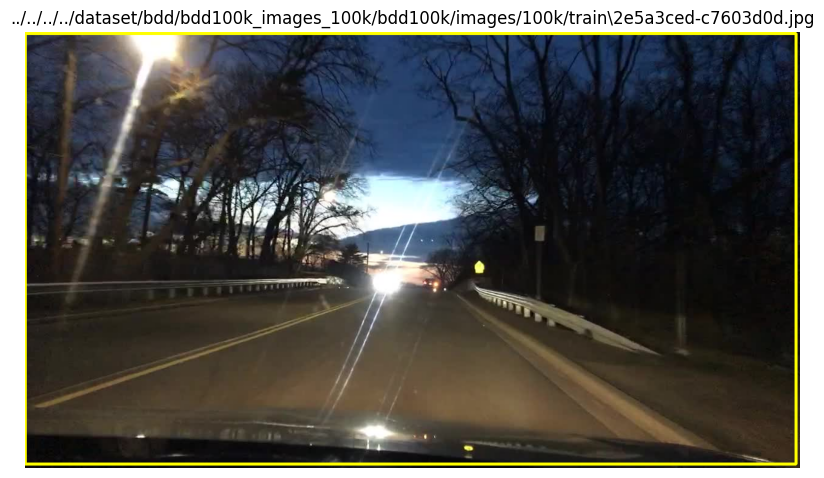

In [5]:
N1 = -20; N2 = -1
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]
wrong_annotation_idx = [5, 18]

sel_image_paths = [os.path.join(dataset_root_dir, path) for path in sel_image_paths]
for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    if idx in wrong_annotation_idx:
        print('='*100)
        print(f'idx: {idx}')
        print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
        print(f'box area         : {sel_boxes_area[idx]}') 
        print(f'box width        : {boxes_w[idx]}') 
        print(f'box height       : {boxes_h[idx]}') 
        print(f'box class        : {obj_label}')
        vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

## Extreme aspect ratio: box width much SMALLER than box height 

In [6]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_aspect_ratio', order='ascending')

box_aspect_ratio_sorted[:100]

array([0.00151018, 0.00549144, 0.0083372 , 0.02777763, 0.03125051,
       0.0327937 , 0.03333273, 0.0370362 , 0.04742542, 0.04848455,
       0.05000021, 0.0524087 , 0.05351559, 0.05555537, 0.05555619,
       0.05555649, 0.05882359, 0.06053268, 0.06101188, 0.06249857,
       0.0624996 , 0.06249997, 0.06302521, 0.06306313, 0.06451014,
       0.06451602, 0.0650411 , 0.06557345, 0.06593408, 0.06666275,
       0.06666626, 0.0666663 , 0.06666666, 0.06666667, 0.06672616,
       0.06793828, 0.07042253, 0.07042256, 0.07070673, 0.07079645,
       0.07128657, 0.07142497, 0.07142856, 0.07142921, 0.07216508,
       0.07277627, 0.07352936, 0.07407395, 0.07407407, 0.07462686,
       0.07500049, 0.07619051, 0.0765243 , 0.07691954, 0.07692235,
       0.0769226 , 0.07692406, 0.07746443, 0.07777857, 0.07843087,
       0.07911199, 0.08      , 0.08064516, 0.0810812 , 0.08108155,
       0.08151399, 0.08238047, 0.08275828, 0.08292689, 0.08333249,
       0.08333334, 0.08333334, 0.08333334, 0.08333452, 0.08393

idx: 1
box aspect ratio : 0.005491441115736961
box area         : 111.67627716064453
box width        : 0.783111572265625
box height       : 142.6058349609375
box class        : car


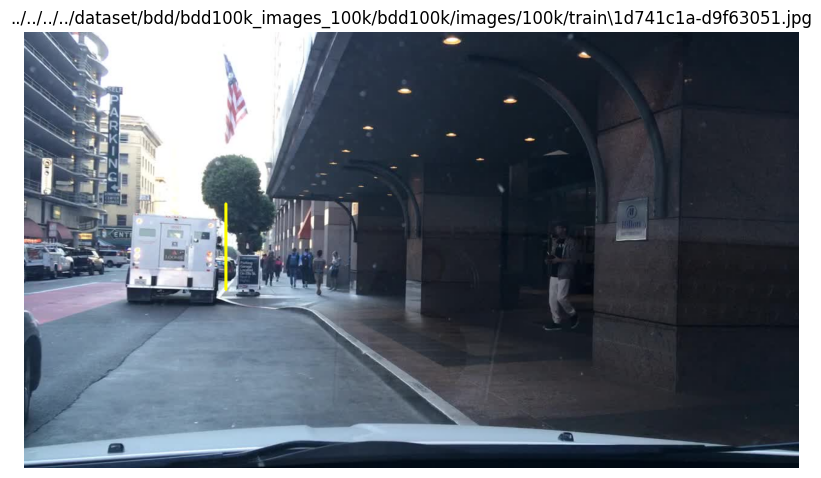

idx: 3
box aspect ratio : 0.02777762897312641
box area         : 759.1505126953125
box width        : 4.59210205078125
box height       : 165.31655883789062
box class        : car


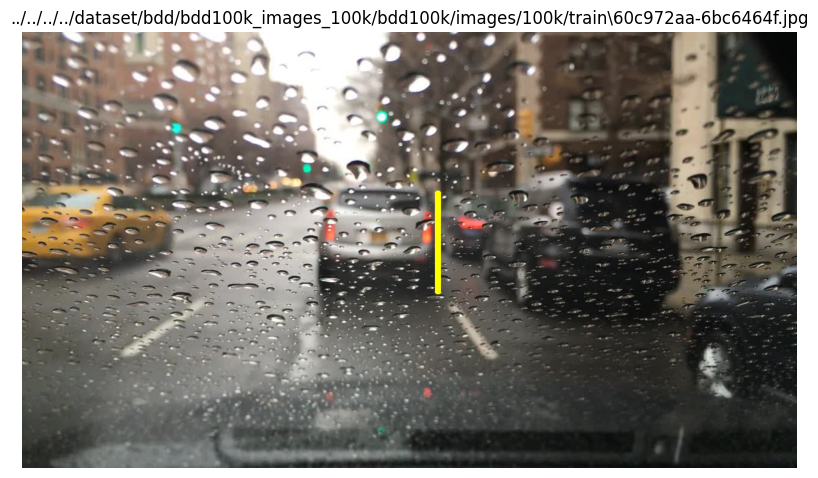

idx: 4
box aspect ratio : 0.03125051036477089
box area         : 97.80025482177734
box width        : 1.74822998046875
box height       : 55.94244384765625
box class        : car


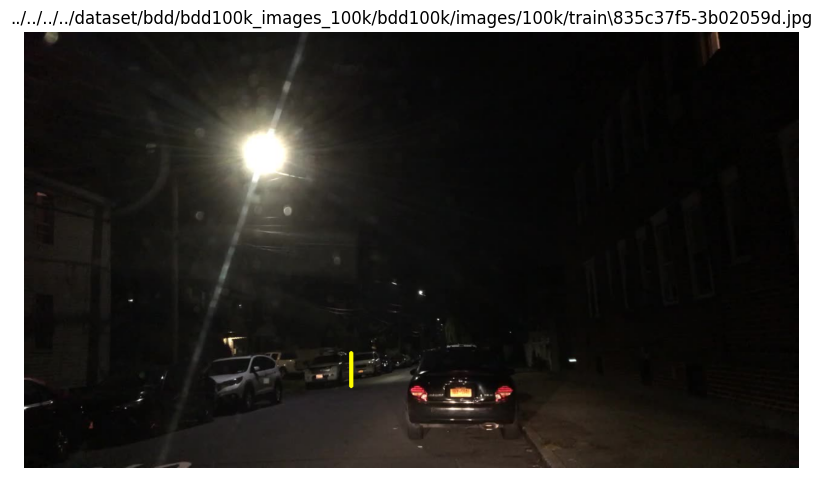

In [7]:
N1 = 0; N2 = 10
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]
invalid_idx = [1, 3, 4]

sel_image_paths = [os.path.join(dataset_root_dir, path) for path in sel_image_paths]
for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    if idx in invalid_idx:
        print('='*100)
        print(f'idx: {idx}')
        print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
        print(f'box area         : {sel_boxes_area[idx]}') 
        print(f'box width        : {boxes_w[idx]}') 
        print(f'box height       : {boxes_h[idx]}') 
        print(f'box class        : {obj_label}')
        vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

## Extreme aspect ratio: box width much LARGER than box height 

In [8]:
boxes_sorted, obj_class_sorted, box_area_sorted, box_aspect_ratio_sorted, image_paths_sorted \
    = sort_according_to_box_criteria(boxes_all, obj_class_all, box_area_all, box_aspect_ratio_all, image_paths_all, \
                                     sorting_criteria='box_aspect_ratio', order='descending')

box_aspect_ratio_sorted[:100]

array([496.82852  , 231.24901  , 230.99202  , 129.88356  , 117.12876  ,
       117.02688  , 100.99754  ,  66.00013  ,  63.332954 ,  63.000397 ,
        51.000595 ,  50.999992 ,  50.998917 ,  50.862274 ,  48.811996 ,
        43.66657  ,  42.73153  ,  42.00023  ,  38.63156  ,  38.009853 ,
        34.200005 ,  33.796196 ,  33.189037 ,  33.000187 ,  32.999348 ,
        32.166668 ,  31.999723 ,  30.698153 ,  30.000183 ,  28.000637 ,
        25.999634 ,  25.878824 ,  25.000551 ,  24.999983 ,  24.599998 ,
        24.500143 ,  24.399998 ,  23.00012  ,  22.333284 ,  21.81818  ,
        21.777807 ,  21.76923  ,  20.999939 ,  20.869555 ,  20.470589 ,
        20.22222  ,  20.100462 ,  20.00038  ,  20.000217 ,  20.       ,
        19.23077  ,  19.000172 ,  19.000097 ,  18.999987 ,  18.999847 ,
        18.799997 ,  18.500006 ,  18.199957 ,  17.857138 ,  17.599995 ,
        17.500095 ,  17.000034 ,  16.999723 ,  16.724154 ,  16.666695 ,
        16.511822 ,  16.499868 ,  16.407537 ,  16.400005 ,  16.2

idx: 9
box aspect ratio : 63.000396728515625
box area         : 1003.8577880859375
box width        : 251.48248291015625
box height       : 3.99176025390625
box class        : car


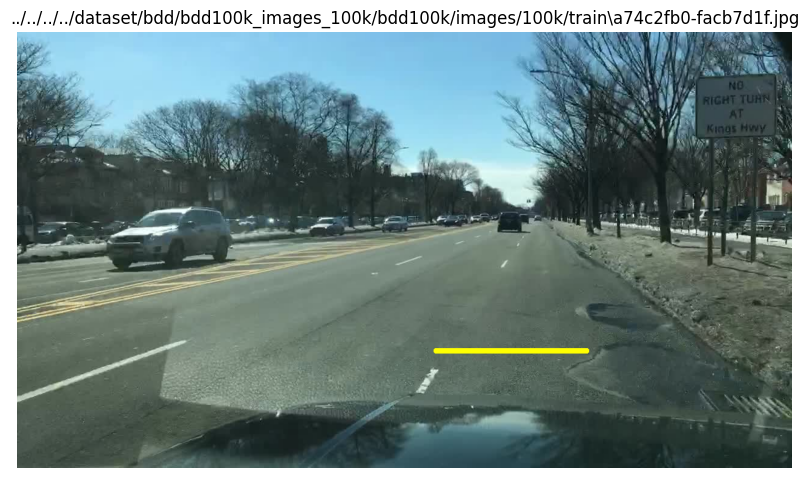

idx: 18
box aspect ratio : 38.631561279296875
box area         : 21712.3984375
box width        : 915.8514404296875
box height       : 23.70733642578125
box class        : train


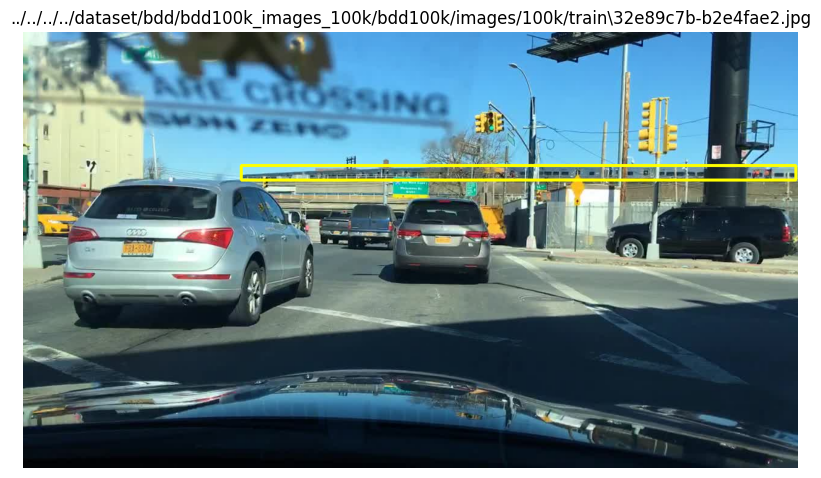

idx: 19
box aspect ratio : 38.00985336303711
box area         : 8202.568359375
box width        : 558.3712158203125
box height       : 14.690170288085938
box class        : traffic sign


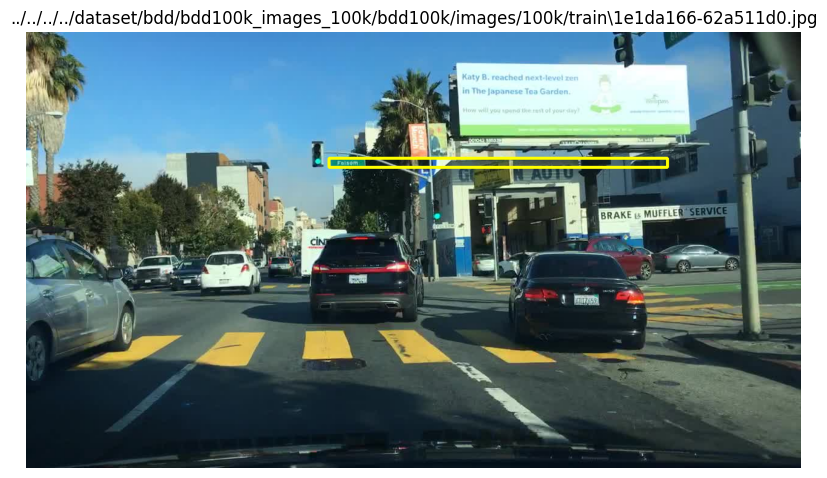

In [9]:
N1 = 0; N2 = 30
sel_boxes_area = box_area_sorted[N1:N2]
sel_boxes_aspect_ratio = box_aspect_ratio_sorted[N1:N2]
sel_boxes = boxes_sorted[N1:N2]
sel_image_paths = image_paths_sorted[N1:N2]
sel_obj_class = obj_class_sorted[N1:N2]

boxes_w = sel_boxes[:, 2] - sel_boxes[:, 0]
boxes_h = sel_boxes[:, 3] - sel_boxes[:, 1]
# invalid_idx = [9, 18, 19, 20, 22]
invalid_idx = [9, 18, 19]

sel_image_paths = [os.path.join(dataset_root_dir, path) for path in sel_image_paths]
for idx, (img_path, obj_label) in enumerate(zip(sel_image_paths, sel_obj_class)):
    if idx in invalid_idx:
        print('='*100)
        print(f'idx: {idx}')
        print(f'box aspect ratio : {sel_boxes_aspect_ratio[idx]}')
        print(f'box area         : {sel_boxes_area[idx]}') 
        print(f'box width        : {boxes_w[idx]}') 
        print(f'box height       : {boxes_h[idx]}') 
        print(f'box class        : {obj_label}')
        vizualize_bbox(img_path, sel_boxes[idx:idx+1], figsize=(10,10))

### Conclusion
<ul>
  <li> Traffic Light, Traffic Sign, Train are not considered for training </li>

  <li> 'person' and 'rider' class are merged as 'person' </li>

  <li> 'bus' and 'truck' class are merged as 'large_vehicle' </li>

  <li> 'bike' and 'motor' class are merged as 'bike' </li>
  
  <li> bounding boxes that are below a certain threshold in terms of 1) width 2) height 3) aspect ratio are not considered as positive samples </li>
</ul>